# FINAL PROJECT - SPRINT 10 / OILYGIANT 

## 1. DESCRIPCIÓN DEL PROYECTO

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

### 1.1 OBJETIVO

Encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

### 1.2 CONDICIONES

1. Solo se debe usar la regresión lineal para el entrenamiento del modelo.
2. Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
3. El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
4. Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
5. Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

### 1.3 DESCRIPCIÓN DE LOS DATOS

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

- geo_data_0.csv. 
- geo_data_1.csv. 
- geo_data_2.csv. 
- id — identificador único de pozo de petróleo
- f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- product — volumen de reservas en el pozo de petróleo (miles de barriles).

## 2. ABRIR Y LEER LOS ARCHIVOS

### 2.1 IMPORTAR LAS LIBRERÍAS

In [1]:
# Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

### 2.2 CARGAR LOS ARCHIVOS

In [2]:
# Abrir los archivos y guardarlos en diferentes variables
df0 = pd.read_csv('geo_data_0.csv')
df1 = pd.read_csv('geo_data_1.csv')
df2 = pd.read_csv('geo_data_2.csv')

## 3. VISUALIZAR LA INFORMACIÓN DE LOS ARCHIVOS

### 3.1 PRIMER DATASET - df0

In [3]:
# Examinar informacion general df0
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
# Visualizar las primeras filas del archivo
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
# Obtener indicadores generales del dataset
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


#### COMENTARIO

- El dataset parece estar completo y no contiene valores ausentes. 
- Se compone de 100,000 filas (observaciones) y 5 columnas. 
- Aparentemente el tipo de valores (object y float) corresponde a los expresados en el dataset.

### 3.2 SEGUNDO DATASET - df1

In [6]:
# Examinar informacion general df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# Visualizar las primeras filas del archivo
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
# Obtener indicadores generales del dataset
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


#### COMENTARIO

- En general, la calidad de los datos del conjunto de datos es similar al conjunto de datos df0.
- Se compone de 100,000 filas (observaciones) y 5 columnas.
- Hay una diferencia significativa entre los valores promedio (media) y mediana (50%), especialmente en las columnas f2 y product. Esto sugiere la presencia de valores atípicos en los datos.

### 3.3 TERCER DATASET - df2

In [9]:
# Examinar informacion general df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
# Visualizar las primeras filas del archivo
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
# Obtener indicadores generales del dataset
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


#### COMENTARIO

- El dataset parece estar completo y no contiene valores ausentes. 
- Se compone de 100,000 filas (observaciones) y 5 columnas. 
- Nuevamente hay una diferencia entre los valores promedio (media) y mediana (50%), especialmente en las columnas f0 y f1. Esto sugiere la presencia de valores atípicos en los datos.

## 4. MODELADO Y ANÁLISIS

### 4.1 DIVIDIR LOS DATOS Y ENTRENAR EL MODELO PARA CADA REGIÓN

Aquí están los pasos que seguimos:

- Dividimos los datos en un conjunto de entrenamiento y un conjunto de validación con una proporción de 75:25.
- Entrenamos el modelo y realizamos predicciones para el conjunto de validación.
- Guardamos las predicciones y los valores reales del conjunto de validación.
- Calculamos el volumen promedio de las reservas de petróleo predichas y el RMSE del modelo.
- Analizamos los resultados.

#### 4.1.1 CONSOLIDAR DATOS EN UNA LISTA ÚNICA

Para optimizar el proceso de entrenamiento del modelo en la función, combinaremos los tres conjuntos de datos en una sola lista. Además, eliminaremos la columna 'id' ya que no se considera relevante para el entrenamiento del modelo.

In [12]:
# Unificar los datos en una sola lista eliminando 'id'
data_all = [
    df0.drop('id', axis=1),
    df1.drop('id', axis=1),
    df2.drop('id', axis=1),
]

#### 4.1.2 DIVIDIR LOS DATOS Y ENTRENAR EL MODELO

In [16]:
state = np.random.RandomState(12345)

# Utilizare estas dos variables mas adelante para calcular las ganancias en las siguientes secciones
# Por ahora pueden ignorarse
samples_target = []
samples_predict = []

for region in range(len(data_all)):
    data = data_all[region]
    
    features = data.drop('product', axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=state)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    
    samples_target.append(target_valid.reset_index(drop=True))
    samples_predict.append(pd.Series(prediction))
    
    mean_product_target = target.mean()
    mean_product_valid = target_valid.mean()
    mean_product_predict = prediction.mean()
    model_rmse = mean_squared_error(target_valid, prediction)**0.5
    
    print("-- Region", region, "--")
    print("Mean Product Target Amount =", mean_product_target)
    print("Mean Product Valid Amount =", mean_product_valid)
    print("Mean Product Predict Amount =", mean_product_predict)
    print("Model RMSE =", model_rmse)
    print()

-- Region 0 --
Mean Product Target Amount = 92.50000000000001
Mean Product Valid Amount = 92.07859674082927
Mean Product Predict Amount = 92.59256778438035
Model RMSE = 37.5794217150813

-- Region 1 --
Mean Product Target Amount = 68.82500000000002
Mean Product Valid Amount = 68.77162424984647
Mean Product Predict Amount = 68.76995145799754
Model RMSE = 0.8897367737680649

-- Region 2 --
Mean Product Target Amount = 95.00000000000004
Mean Product Valid Amount = 94.74895871720241
Mean Product Predict Amount = 95.087528122523
Model RMSE = 39.958042459521614



#### 4.1.3 RMSE VISUALIZACIÓN

-- Region 0 --
Model RMSE = 37.5794217150813



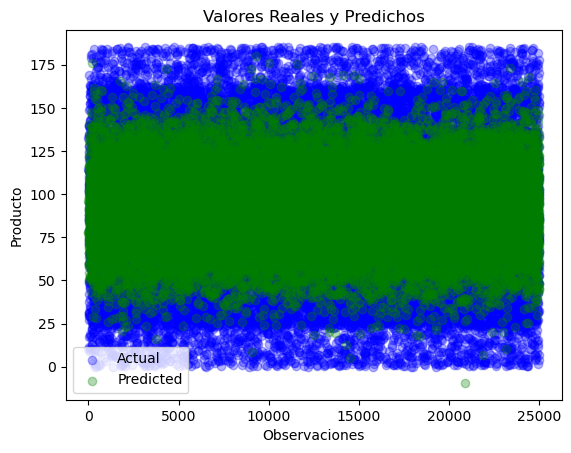

-- Region 1 --
Model RMSE = 0.8897367737680649



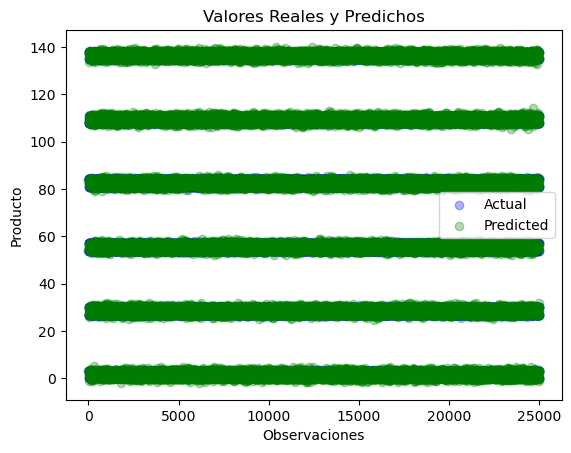

-- Region 2 --
Model RMSE = 39.958042459521614



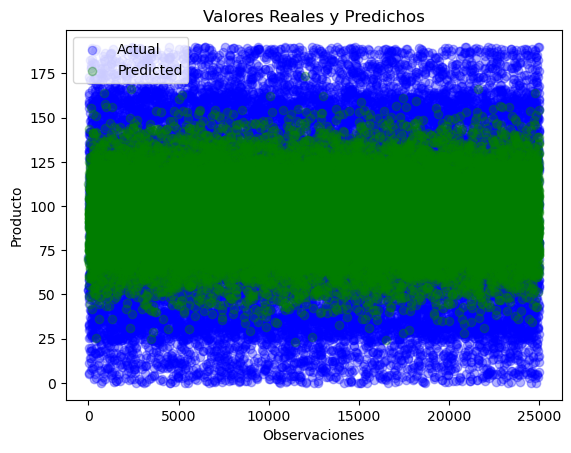

In [20]:
state = np.random.RandomState(12345)

for region in range(len(data_all)):
    data = data_all[region]
    
    features = data.drop('product', axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=state)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    
    model_rmse = mean_squared_error(target_valid, prediction)**0.5
    
    print("-- Region", region, "--")
    print("Model RMSE =", model_rmse)
    print()
    _, ax = plt.subplots()

    ax.scatter(x = range(0, target_valid.size), y=target_valid, c = 'blue', label = 'Actual', alpha = 0.3)
    ax.scatter(x = range(0, prediction.size), y=prediction, c = 'green', label = 'Predicted', alpha = 0.3)

    plt.title('Valores Reales y Predichos')
    plt.xlabel('Observaciones')
    plt.ylabel('Producto')
    plt.legend()
    plt.show()

#### COMENTARIO

- La Región 1 tiene el valor más bajo de RMSE, lo que indica una mayor precisión en comparación con las otras regiones.
- Sin embargo, el volumen promedio de reservas de petróleo predichas (Media de Producto Predicho) en la Región 1 es el más bajo entre las tres regiones.
- Por otro lado, la Región 2 tiene el mayor volumen promedio de reservas de petróleo predichas.
- Sin embargo, la Región 2 también tiene el valor más alto de RMSE, lo que indica una menor precisión en las predicciones en esta región.

### 4.2 PREPARACIÓN PARA EL CÁLCULO DE GANANCIAS

Aquí están los pasos a seguir:

- Guardar todos los valores clave para el cálculo de ganancias en variables separadas.
- Calcular el volumen mínimo de reservas de petróleo requerido para el desarrollo rentable de nuevos pozos.
- Comparar el volumen mínimo calculado con el volumen promedio de reservas de petróleo en cada región.
- Proporcionar hallazgos y recomendaciones sobre la preparación para el cálculo de ganancias.

#### 4.2.1 ALMACENAMIENTO DE VALORES CLAVE

Aquí está la información que recibimos sobre los valores clave relevantes para los cálculos de ganancias:

- El número de puntos de muestra para el cálculo de ganancias es de los 200 puntos principales seleccionados de un estudio de 500 puntos de muestra.
- El presupuesto para desarrollar 200 pozos de petróleo es de USD 100 millones.
- Cada barril de petróleo crudo genera ingresos de USD 4.5.
- Los ingresos por una unidad de producto son de USD 4,500 (volumen de reservas de petróleo en miles de barriles).

In [21]:
# Almacenamiento de valores clave
total_sample = 500
top_sample = 200
budget = 100000000
cost_per_point = budget / top_sample
revenue_per_product = 4500

#### 4.2.2 CALCULANDO EL VOLUMEN MÍNIMO DE RESSERVAS DE PETRÓLEO REQUERIDO

Para no perder dinero, los ingresos por punto deben superar el costo por punto.

In [22]:
# Calcular el volumen minimo de produccion
min_volume_product = cost_per_point / revenue_per_product
min_volume_product

111.11111111111111

#### COMENTARIO

Encontramos que para no perder, un sitio debe tener un volumen de producción de al menos 111.11 unidades de producto.

#### 4.2.3 VOLUMEN PROMEDIO DE RESERVAS DE PETRÓLEO POR REGIÓN

Lo siguientes cálculos son el volumen promedio de producción por cada región:

In [23]:
# Volumen promedio de petroleo por region
print('Producción Promedio de la Región 0:', round(df0['product'].mean(), 2))
print('Producción Promedio de la Región 1:', round(df1['product'].mean(), 2))
print('Producción Promedio de la Región 2:', round(df2['product'].mean(), 2))

Producción Promedio de la Región 0: 92.5
Producción Promedio de la Región 1: 68.83
Producción Promedio de la Región 2: 95.0


#### VISUALIZACIÓN DE LA INFORMACIÓN

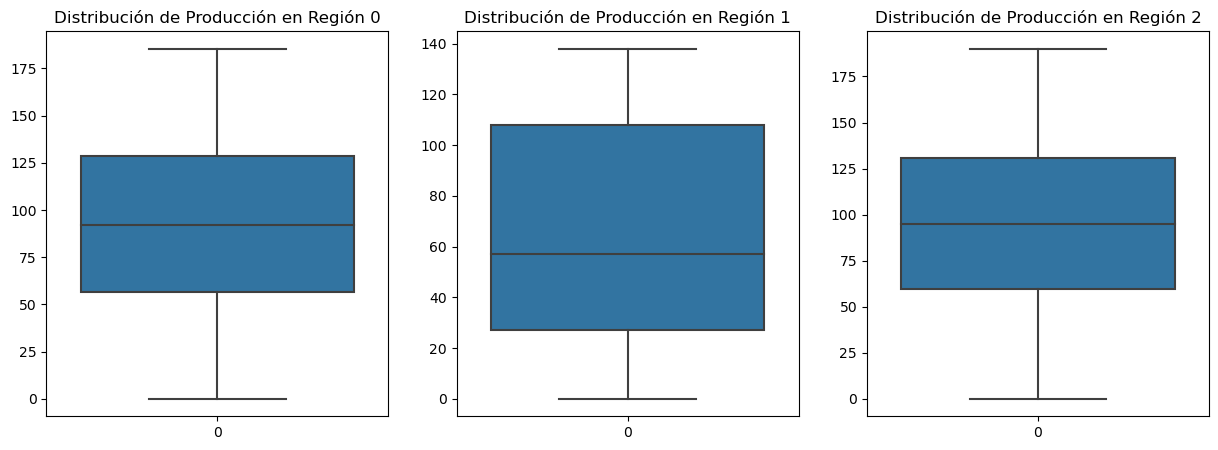

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Distribución de Producción en Región 0')
sns.boxplot(df0['product'])

plt.subplot(1, 3, 2)
plt.title('Distribución de Producción en Región 1')
sns.boxplot(df1['product'])

plt.subplot(1, 3, 3)
plt.title('Distribución de Producción en Región 2')
sns.boxplot(df2['product'])

plt.show()

En general, la producción promedio en las tres regiones cae por debajo del umbral mínimo para la rentabilidad, que es de 111.11 unidades de producto.

#### COMENTARIO

- El volumen promedio de producción en cada región generalmente está por debajo del umbral mínimo para la rentabilidad.
- Esto indica que un número significativo de pozos de petróleo en las tres regiones no son rentables.
- Entre las regiones, la Región 1 tiene el volumen promedio de producción más bajo, lo que sugiere que tiene una menor probabilidad de ser rentable en comparación con la Región 0 y la Región 2.

### 4.3 CALCULANDO LAS GANANCIAS

Pasos a seguir:

- Identificar el pozo de petróleo con el valor predicho más alto.
- Calcular el volumen total de reservas de petróleo basado en estas predicciones.
- Recomendar un área específica para el desarrollo de pozos de petróleo y proporcionar una justificación para su elección.
- Calcular la ganancia basada en el volumen adquirido de reservas de petróleo.

#### 4.3.1 SELECCIONAR EL POZO CON EL VALOR PREDICTIVO MAS ALTO

Previamente creamos una variable **samples_predict** que incluye todas las muestras de las tres regiones operativas. Ahora analizaremos los 200 pozos con los valores predichos más altos.

In [35]:
# Crear una nueva variable con el top 200 de pozos con los valores predichos mas altos
top_200_product_0 = samples_predict[0].sort_values(ascending=False)[:200]
top_200_product_0.head(10)

9317     180.180713
219      176.252213
10015    175.850623
11584    175.658429
23388    173.299686
4296     172.627972
8993     172.501678
14125    169.124234
14707    168.787602
12461    168.206015
dtype: float64

In [36]:
# Crear una nueva variable con el top 200 de pozos con los valores predichos mas altos
top_200_product_1 = samples_predict[1].sort_values(ascending=False)[:200]
top_200_product_1.head(10)

10423    139.984575
12384    139.816303
16993    139.676116
7023     139.587876
6120     139.528108
7301     139.513836
22808    139.482052
10880    139.446705
14889    139.389238
13654    139.386717
dtype: float64

In [37]:
# Crear una nueva variable con el top 200 de pozos con los valores predichos mas altos
top_200_product_2 = samples_predict[2].sort_values(ascending=False)[:200]
top_200_product_2.head(10)

12030    173.791575
2349     166.060020
21588    165.952515
855      163.902074
24763    163.848998
5188     162.554248
12998    162.213042
10093    162.023222
17459    161.275116
5048     160.341135
dtype: float64

#### 4.3.2 CALCULANDO EL VOLUMEN DE RESERVAS DE PETRÓLEO OBJETIVO BASADO EN PREDICCIONES

Calcularemos el volumen de producción acumulado para los primeros 200 puntos en cada región.

Previamente, identificamos los primeros 200 puntos en cada región basados en la variable samples_predict. 

Ahora, utilizaremos los índices correspondientes de estas predicciones para recuperar el volumen real de producción de la variable samples_target. Ya hemos preparado esta variable de antemano.

In [38]:
print("Total Volume Top 200 Region 0:", samples_target[0][top_200_product_0.index].sum().round(2))
print("Total Volume Top 200 Region 1:", samples_target[1][top_200_product_1.index].sum().round(2))
print("Total Volume Top 200 Region 2:", samples_target[2][top_200_product_2.index].sum().round(2))

Total Volume Top 200 Region 0: 29601.84
Total Volume Top 200 Region 1: 27589.08
Total Volume Top 200 Region 2: 27866.48


#### COMENTARIO

La Región 1 tiene el volumen de producción más bajo en los mejores 200 puntos, mientras que la Región 0 tiene el más alto.

### 4.4 CALCULAR RIESGO Y GANANCIAS POOR REGIÓN

Basándonos en nuestro análisis, hemos identificado la Región 0 como la región con el mayor potencial de ganancias. Sin embargo, es crucial considerar los riesgos potenciales asociados con cada región, ya que estos factores pueden tener un impacto significativo en las perspectivas generales.

Según las instrucciones, nuestra tarea es seleccionar la región con la ganancia promedio más alta asegurando que el riesgo de pérdida permanezca por debajo del 2.5%. Por lo tanto, evaluaremos los factores de riesgo para cada región y determinaremos qué región cumple con este criterio.

Al considerar tanto el potencial de ganancias como el nivel de riesgo aceptable, podremos hacer una recomendación informada para el desarrollo de pozos de petróleo. Procedamos con el análisis y presentemos nuestros hallazgos, incluyendo la justificación de nuestra elección final.

Estas son las instrucciones que recibimos:

- Aplicar la técnica de bootstrapping utilizando 1,000 muestras para determinar la distribución de ganancias.
- Calcular la ganancia promedio, intervalo de confianza del 95%, y riesgo de pérdida.
- Considerar que las pérdidas están representadas por ganancias negativas. Calcular la probabilidad de posibles pérdidas y expresarlas como un porcentaje.
- Presentar tus hallazgos y recomendar un área para el desarrollo de pozos de petróleo, proporcionando justificación o razones para tu elección.

#### 4.4.1 VISUALIZAR LA DISTRIBUCIÓN DE GANANCIAS CON LA TÉCNICA DE 'BOOTSTRAPPING' 

Utilizaremos la técnica de bootstrapping para generar 1000 muestras de objetivos y asociarlas con sus valores predichos correspondientes. 

Siguiendo las instrucciones originales, seleccionaremos una muestra de 500 pozos (almacenada en la variable total_sample). A partir de esta muestra, calcularemos la ganancia para los mejores 200 pozos en cada región (almacenada en la variable top_sample).

Para facilitar este proceso, crearemos una función para calcular la ganancia de cada sitio en el top_sample para cada región.

In [39]:
# Configurando la funcion para el calculo de ganancias
def profit_prep(target, predictions):
    top_samples_predict = predictions.sort_values(ascending=False)[:top_sample]
    top_samples_target = target[top_samples_predict.index]
    total_volume = top_samples_target.sum()
    profit = total_volume * revenue_per_product - budget
    return profit 

A continuación, generaremos una distribución de ganancias utilizando la técnica de bootstrapping con 1,000 muestras.

In [40]:
# Crea una función para la distribución de ganancias mediante la técnica de bootstrapping
def profit_dist(target, predictions, region):
    state = np.random.RandomState(12345)
    target = target[region]
    predictions = predictions[region]
    
    profit_values = []
    
    for i in range(1000):
        predictions_sample = predictions.sample(total_sample, replace=True, random_state=state)
        target_sample = target[predictions_sample.index]
        profit_values.append(profit_prep(target_sample, predictions_sample))
    return pd.Series(profit_values)

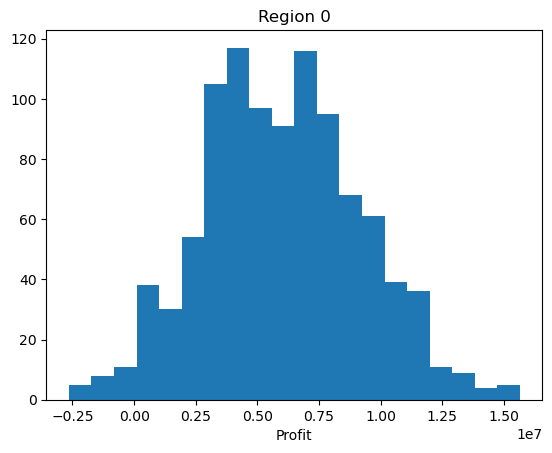

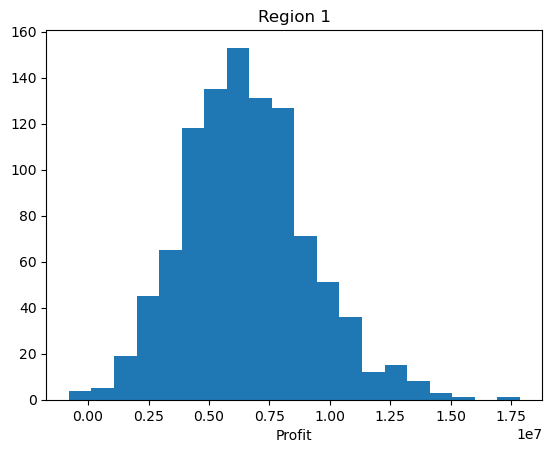

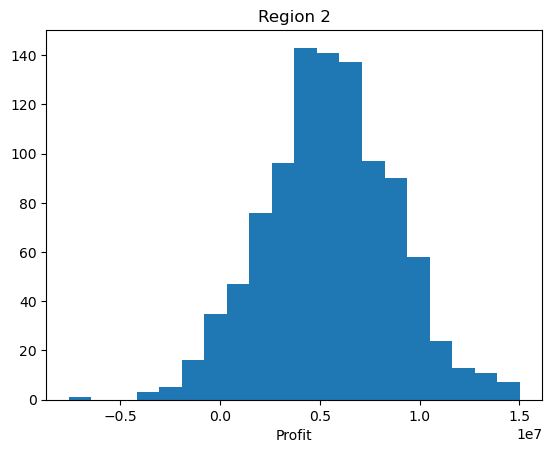

In [43]:
# Visualizacion de la distribucion de las ganancias
profit_reg0 = profit_dist(samples_target, samples_predict, 0)
profit_reg1 = profit_dist(samples_target, samples_predict, 1)
profit_reg2 = profit_dist(samples_target, samples_predict, 2)

plots = [profit_reg0, profit_reg1, profit_reg2] 
titles = ['Region 0', 'Region 1', 'Region 2'] 
for i in range(3):
    plt.hist(plots[i], bins=20)
    plt.title(titles[i])
    plt.xlabel('Profit')
    plt.show()

#### COMENTARIO

Basándonos en esta visualización, es evidente que la mayoría de los 200 mejores puntos en cada región son rentables.

#### 4.4.2 GANANCIA PROMEDIO, INTERVALO DE CONFIANZA DEL 95% Y RIESGO DE PÉRDIDA

En el siguiente análisis, calcularemos la ganancia promedio para cada región utilizando el método de bootstrapping, junto con un intervalo de confianza del 95%. Además, evaluaremos el riesgo de pérdida asociado con la inversión en los 200 mejores puntos en cada región.

In [48]:
for region in range(3):
    state = np.random.RandomState(12345)
    target = samples_target[region]
    predictions = samples_predict[region]
    
    profit_values = []
    
    for i in range(1000):
        predictions_sample = predictions.sample(total_sample, replace=True, random_state=state)
        target_sample = target[predictions_sample.index]
        profit_values.append(profit_prep(target_sample, predictions_sample))
    
    profit_values = pd.Series(profit_values)
    
    mean_profit = profit_values.mean()
    confidence_interval = (profit_values.quantile(0.025), profit_values.quantile(0.975))
    negative_profit_chance = (profit_values < 0).mean()
    
    print("-- Region", region, "--")
    print("Ganancia Promedio =", mean_profit.round(2), "USD")
    print("Intervalo de Confianza del 95% =", confidence_interval)
    print("Riesgo de Perdidas =", negative_profit_chance * 100, "%")
    print()

-- Region 0 --
Ganancia Promedio = 6007352.44 USD
Intervalo de Confianza del 95% = (129483.3113511391, 12311636.057914983)
Riesgo de Perdidas = 2.0 %

-- Region 1 --
Ganancia Promedio = 6530570.44 USD
Intervalo de Confianza del 95% = (1850905.0361907296, 12319463.504410451)
Riesgo de Perdidas = 0.4 %

-- Region 2 --
Ganancia Promedio = 5499779.97 USD
Intervalo de Confianza del 95% = (-786444.3395378962, 11865432.687347138)
Riesgo de Perdidas = 4.8 %



#### COMENTARIO

Basándonos en nuestros cálculos, hemos determinado que la Región 1 ofrece la mayor ganancia promedio con el menor riesgo de pérdida. Sin embargo, la Región 0 también se encuentra dentro de un umbral de riesgo aceptable, que está por debajo del 2.5%. Además, la Región 0 muestra una ganancia promedio relativamente alta.

#### 4.4.3 DECISIÓN FINAL DE LA MEJOR ÁREA PARA EL DESARROLLO DE POZOS

1. **Análisis de riesgo y distribución de ganancias**: Los cálculos de riesgo y la distribución de ganancias sugieren que la Región 0 es una opción viable. Este análisis indica que, a pesar de cierto riesgo, la Región 0 ofrece un potencial de ganancias significativo.

2. **Potencial de ganancias en general**: La evaluación general del potencial de ganancias favorece a la Región 0, lo que implica que es una opción rentable en comparación con otras regiones.

3. **Región 1 - Debilidades identificadas**: Aunque la Región 1 ofrece el menor riesgo y el mayor potencial de ganancias promedio, se han identificado debilidades adicionales mediante un análisis más detallado. Estas debilidades incluyen reservas de petróleo promedio más bajas y el menor potencial de ganancias en comparación con las otras regiones.

## 5. CONCLUSIÓN

Hemos concluido con éxito el proceso de aplicación de aprendizaje automático para determinar la ubicación más adecuada para la perforación de un nuevo pozo petrolero en nombre de OilyGiant, una empresa dedicada a la extracción de petróleo. Según nuestro análisis, recomendamos **dirigir nuestra atención hacia los mejores 200 sitios de perforación en la Región 0.**

Nuestro estudio revela una serie de ventajas significativas asociadas con la Región 0, como se determina a través de las pruebas de aprendizaje automático realizadas:

1. Posee el segundo mayor volumen promedio de reservas de petróleo entre todas las regiones consideradas.
2. Exhibe el segundo mejor puntaje de RMSE, indicando una alta precisión en nuestras predicciones.
3. Alberga el volumen total más elevado de reservas de petróleo entre los 200 mejores sitios identificados.
4. Ofrece el mayor potencial de ganancias total entre estos mismos 200 sitios.
5. Mantiene un nivel de riesgo de pérdida tolerable, que se encuentra por debajo del 2.5%.

Por lo tanto, llegamos a la conclusión de que la Región 0 representa la opción más óptima para la perforación de un nuevo pozo petrolero en nombre de OilyGiant.

Además, para reforzar aún más esta recomendación, podemos considerar los siguientes puntos:

6. Estabilidad de la infraestructura: Por las características observadas en los datos de la Región 0, podríamos decir que cuenta con una infraestructura más estable y desarrollada en comparación con otras regiones, lo que facilitaría la operación de perforación y extracción.

7. Potencial de expansión: Dado el alto volumen de reservas de petróleo y el potencial de ganancias identificado en la Región 0, existe la posibilidad de una expansión futura de las operaciones de extracción en esta área, lo que podría generar beneficios adicionales a largo plazo para OilyGiant.

Al tomar en consideración estos aspectos adicionales, se fortalece la recomendación de `centrar los esfuerzos de perforación en la Región 0 para OilyGiant.`